<a href="https://colab.research.google.com/github/ale-camer/Finance/blob/master/DJIA%20Risk-Return%20Tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
from pandas_datareader import data as pdr
plt.style.use('seaborn-colorblind')

np.random.seed(123)
tickers = ["UNH", "GS", "HD", "MSFT", "BA", "AMGN", "CRM", "MCD", "V", "HON", "CAT", "MMM", "DIS", "JNJ", "AXP", "JPM", "TRV", "IBM", "WMT", "PG", "NKE", "AAPL", "CVX", "MRK", "DOW", "INTC", "VZ", "KO", "WBA", "CSCO",]

prices = pdr.get_data_yahoo(tickers, start = '2015-01-01', end = dt.date.today())['Adj Close']
returns = prices.pct_change()

monthly_prices = prices.asfreq('BM').ffill()
monthly_returns = monthly_prices.pct_change()

In [2]:
pip install PyPortfolioOpt

     |████████████████████████████████| 61kB 8.3MB/s 
     |████████████████████████████████| 1.3MB 38.6MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
  Created wheel for cvxpy: filename=cvxpy-1.1.13-cp37-cp37m-linux_x86_64.whl size=2736210 sha256=783dbc65586366ea3723eb5d445a693aa7baac6aadecec4f853dca9c30913cc4
  Stored in directory: /root/.cache/pip/wheels/f9/78/00/f29636789ee83434953b5442f16ec3f9834a68e7fd0393c220
Successfully built cvxpy
  Found existing installation: cvxpy 1.0.31
    Uninstalling cvxpy-1.0.31:
      Successfully uninstalled cvxpy-1.0.31


In [57]:
from pypfopt import expected_returns
from pypfopt import risk_models

mu = expected_returns.mean_historical_return(monthly_prices, frequency = 12)
covmat = risk_models.sample_cov(monthly_prices, frequency = 12)
sd = np.sqrt(np.diag(covmat))

def portfolio_metrics(weights, mean_returns, cov_matrix):
    ret = np.sum(mean_returns * weights)
    std = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights)))
    return ret, std

def random_portfolios(num_port, mean_returns, cov_matrix):
    metrics = np.zeros((2,num_port))
    weights_matrix = []
    
    for i in range(num_port):
        weights = np.random.random(len(mean_returns))
        weights /= np.sum(weights)
        weights_matrix.append(weights)
        port_mu, port_std = portfolio_metrics(weights, mean_returns, cov_matrix)
        metrics[0,i] = port_mu
        metrics[1,i] = port_std
    return metrics, weights_matrix

n_port = 1000000
metrics, weights_matrix = random_portfolios(n_port, mu, covmat)

/usr/local/lib/python3.7/dist-packages/pypfopt/risk_models.py:69: UserWarning: The covariance matrix is non positive semidefinite. Amending eigenvalues.
  "The covariance matrix is non positive semidefinite. Amending eigenvalues."


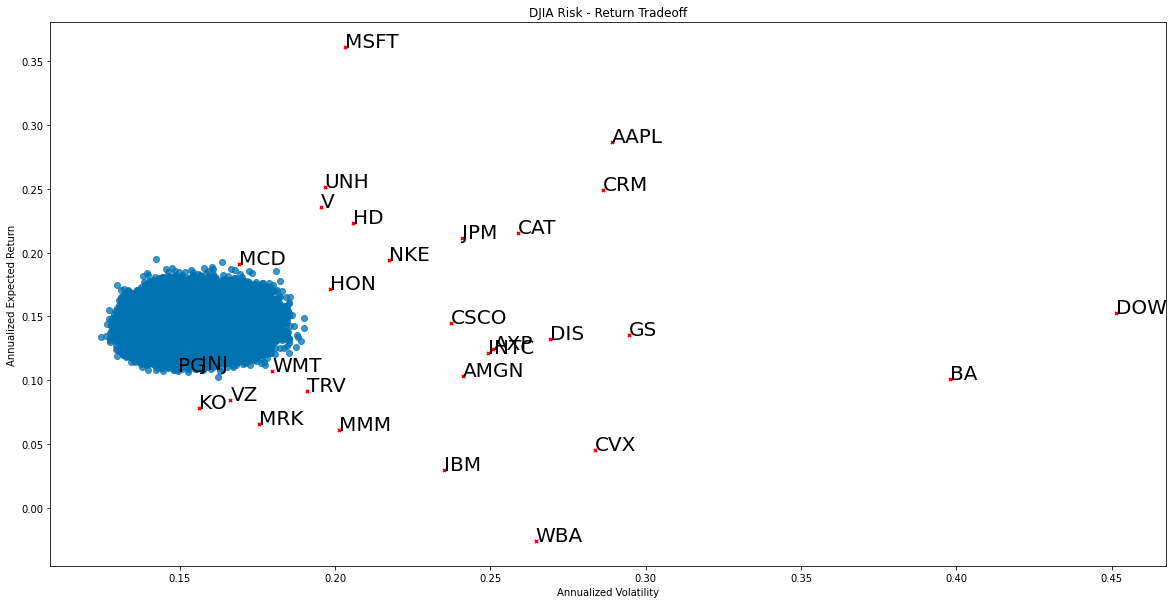

In [58]:
plt.figure(figsize = (20, 10))
plt.plot(metrics[1 , : ], metrics[0, : ], 'o', alpha = 0.75)
plt.scatter(sd, mu,marker = 'x', color = 'red', s = 10)
for i in range(len(sd)):
    plt.annotate(mu.index[i], (sd[i], mu[i]), fontsize = 20)
plt.title('DJIA Risk - Return Tradeoff')
plt.xlabel('Annualized Volatility')
plt.ylabel('Annualized Expected Return')
plt.show()